### Data Wrangling Project

   #### TOC

 1. Data Gathering
 2. Data Loading
 3. Assement
 4. Cleaning
 5. Analyses

#### 1. Data Gathering

In [13]:
import tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [14]:
# Loading the first datafile
import pandas as pd
df=pd.read_csv('twitter-archive-enhanced.csv') 
df


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [87]:
#looking the types of data the columns are stored
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [88]:
#Checiking for missing data
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
# Creating a copy of the dataset
df_copy1=df.copy()

In [16]:
#Checking the readability of the "source" column 
df_copy1.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [17]:
#Checking the "text" column for retweets
df_copy1.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

### Assessing - Twitter Archive 


###### Quality issues 
1. Timestamp column : At every row in addition to the time there is a "+0000".
2. Retweeted dog ratings - Remove retweeted dog rating as we only want original dog ratings (retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp).  
 2.1 Remove the rows from the text values starting with "RT @" as they represent retweets and not original ratings. 
3. Missing Data (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,    retweeted_status_timestamp)
4. Drop columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,    retweeted_status_timestamp)
5. Tweet_id is stored as intiger - should be converted to string
6. Timestamp is stored as object - should be coverted to datetime
7. Columns rating_numerator and rating_denominator have float datatype
8. Soruce column unclear - remove html tags to make it more readlable 

###### Tidiness issues
1.  Columns doggo, floofer, pupper, puppo should be in one varibale as they all represent one dog and the same information would be easier to have in only one variable.

#### Cleaning Twitter Archive 

#### Quality issues 

###### Define - Issue 1
Remove the "+0000" at the end of each row in the "timestamp" column

##### Code:

In [18]:
#Quality issues 1 - Timestamp column : At every row in addition to the time there is a "+0000".
df_copy1['timestamp'] = df_copy1['timestamp'].map(lambda x: x.lstrip('+').rstrip('+0000'))

###### Test - Issues 1

In [19]:
df_copy1.timestamp.head()

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
3    2017-07-30 15:58:51 
4    2017-07-29 16:00:24 
Name: timestamp, dtype: object

###### Define - Issue 2
Retweeted dog ratings - Remove retweeted dog rating as we only want original dog ratings (retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp).

2.1 Remove the rows from the text values starting with "RT @" as they represent retweets and not original ratings.

###### Code:

In [20]:
#Quality issues 2 - Removing retweets from the coulmns retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
df_copy1 = df_copy1[df_copy1.retweeted_status_id.isnull()]
df_copy1 = df_copy1[df_copy1.retweeted_status_user_id.isnull()]
df_copy1 = df_copy1[df_copy1.retweeted_status_timestamp.isnull()]

# Quality issues 2.1 - Removing rows from the text values starting with "RT @" as they represent retweets and not original ratings.
df_copy1[df_copy1["text"].str.contains("RT @")==False];

###### Test - Issue 2

In [21]:
df_copy1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


###### Define - Issue 3 & 4
3. Missing Data (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
4. Drop columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

###### Code

In [22]:
#Quality issues 3 & 4 - Missing Data, Drop columns
df_copy1.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'], inplace=True);

###### Test - Issue 3 & 4

In [23]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


###### Define Issue 5,6 & 7 
5. Tweet_id is stored as intiger - should be converted to string
6. Timestamp is stored as object - should be coverted to datetime
7. Columns rating_numerator and rating_denominator have float datatype

##### Code

In [25]:
#Issue 5, 6, & 7 - change column type 
df_copy1 = df_copy1.astype({"tweet_id": str}) 
df_copy1 = df_copy1.astype({"rating_numerator": float }) 
df_copy1 = df_copy1.astype({"rating_denominator": float }) 
df_copy1['timestamp'] =  pd.to_datetime(df_copy1['timestamp'], format='%Y%m%d %H:%M:%S')

##### Test - Issue 5, 6, & 7 

In [26]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 203.9+ KB


##### Define - Issue 8: Soruce column unclear - remove html tags to make it more readlable


##### Code

In [28]:
# Issue 8 - removing html from the source column 
df_copy1['source'] = df_copy1['source'].map(lambda x: x.lstrip('<a href=').rstrip(''))

##### Test

In [29]:
df_copy1.source.head()

0    "http://twitter.com/download/iphone" rel="nofo...
1    "http://twitter.com/download/iphone" rel="nofo...
2    "http://twitter.com/download/iphone" rel="nofo...
3    "http://twitter.com/download/iphone" rel="nofo...
4    "http://twitter.com/download/iphone" rel="nofo...
Name: source, dtype: object

#### Tidiness issues 

##### Define - Issue 1: Creating one column from columns doggo, floofer, pupper, puppo


##### Code

In [30]:
# replacing None in with empty string.

df_copy1.doggo.replace('None', '', inplace=True)  #doggo
df_copy1.floofer.replace('None', '', inplace=True) #floofer 
df_copy1.pupper.replace('None', '', inplace=True)  #pupper 
df_copy1.puppo.replace('None', '', inplace=True)   #puppo

In [31]:
# combining columns together
df_copy1['stage'] = df_copy1.doggo + df_copy1.floofer + df_copy1.pupper + df_copy1.puppo

In [33]:
#formating rows with multiple dog stages
df_copy1.loc[df_copy1.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df_copy1.loc[df_copy1.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df_copy1.loc[df_copy1.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

##### Test Tidiness Isues 1 

In [100]:
#Checking if the fixing the issues from above worked
df_copy1

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,,,,
5,891087950875897856,2017-07-29 00:08:17,"""http://twitter.com/download/iphone"" rel=""nofo...",Here we have a majestic great white breaching ...,13.0,10.0,None,,,,,
6,890971913173991426,2017-07-28 16:27:12,"""http://twitter.com/download/iphone"" rel=""nofo...",Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,,,,,
7,890729181411237888,2017-07-28 00:22:40,"""http://twitter.com/download/iphone"" rel=""nofo...",When you watch your owner call another dog a g...,13.0,10.0,None,,,,,
8,890609185150312448,2017-07-27 16:25:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,,,,,
9,890240255349198849,2017-07-26 15:59:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,,,,doggo


In [46]:
#Importing the required packages and loading the dataset image-predictions.tsv
import requests
import pandas as pd

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open('image-predictions.tsv',mode='wb') as file:
            file.write(response.content)

df1=pd.read_csv('image-predictions.tsv',sep='\t')


# link that helepd  get the solution https://knowledge.udacity.com/questions/437744

In [47]:
# Creating a copy of the dataset
df_copy2=df1.copy()

In [48]:
# Making an observation of the data to see for quality & tidiness issues
df_copy2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [106]:
#Checking if the columns were stored in the correct data type & missing data
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Assessing - Image predictions data

###### Quality
1. Row 6 from does not show pictures of dogs. 
2. Row 2074 in P1, P2 and P3 has "false" answer but yet a dog is in the picture.
3. Columns p1, p2 and p3 have unclear names: change to dog_breed_1,dog_breed_2 and dog_breed_3.
4. Columns p1_conf,p2_conf and p3_conf have unclear names: change to breed1_conf,breed2_conf and breed3_conf.
5. Columns p1_dog,p2_dog and p3_dog have unclear names: change to dog_1,dog_2 and dog_3.
6. tweet_id data type intiger, should be string 
7. Column name "img_num" not informative - change to number_of_images. 



### Cleaning - Image predictions data

#### Quality


###### Define - Issues 1 & 2
Remove row "2074 & 6"


##### Code

In [45]:
#Issue 1 & 2 - Remove the rows
df_copy2=df_copy2.drop([2074,6])

##### Test - 1 & 2

In [41]:
df_copy2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True


##### Define - Issues 3, 4 & 5 
Columns p1, p2 and p3 have unclear names: change to dog_breed_1,dog_breed_2 and dog_breed_3.
Columns p1_conf,p2_conf and p3_conf have unclear names: change to breed1_conf,breed2_conf and breed3_conf.
Columns p1_dog,p2_dog and p3_dog have unclear names: change to dog_1,dog_2 and dog_3.


##### Code

In [49]:
#Issues 3
df_copy2.rename(columns={"p1": "dog_breed_1", "p2": "dog_breed_2", "p3": "dog_breed_3"},inplace=True)

#Issues 4
df_copy2.rename(columns={"p1_conf": "breed1_conf", "p2_conf": "breed2_conf", "p3_conf": "breed3_conf"},inplace=True);

#Issues 5
df_copy2.rename(columns={"p1_dog": "dog_1", "p2_dog": "dog_2", "p3_dog": "dog_3"},inplace=True);

##### Test

In [50]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id       2075 non-null int64
jpg_url        2075 non-null object
img_num        2075 non-null int64
dog_breed_1    2075 non-null object
breed1_conf    2075 non-null float64
dog_1          2075 non-null bool
dog_breed_2    2075 non-null object
breed2_conf    2075 non-null float64
dog_2          2075 non-null bool
dog_breed_3    2075 non-null object
breed3_conf    2075 non-null float64
dog_3          2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Define - Issue 6: 
tweet_id data type intiger, should be string


##### Code

In [51]:
#Issues 6 - tweet_id, change column type 
df_copy2 = df_copy2.astype({"tweet_id": str}) 


##### Test -  Issue 6

In [52]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id       2075 non-null object
jpg_url        2075 non-null object
img_num        2075 non-null int64
dog_breed_1    2075 non-null object
breed1_conf    2075 non-null float64
dog_1          2075 non-null bool
dog_breed_2    2075 non-null object
breed2_conf    2075 non-null float64
dog_2          2075 non-null bool
dog_breed_3    2075 non-null object
breed3_conf    2075 non-null float64
dog_3          2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Define - Issue 7: 
Column name "img_num" not informative - change to number_of_images.


##### Code

In [53]:
#Issues 7
df_copy2.rename(columns={"img_num": "number_of_images"},inplace=True);

##### Test

In [54]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id            2075 non-null object
jpg_url             2075 non-null object
number_of_images    2075 non-null int64
dog_breed_1         2075 non-null object
breed1_conf         2075 non-null float64
dog_1               2075 non-null bool
dog_breed_2         2075 non-null object
breed2_conf         2075 non-null float64
dog_2               2075 non-null bool
dog_breed_3         2075 non-null object
breed3_conf         2075 non-null float64
dog_3               2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [55]:
#Importing the required packages and loading the dataset "tweet-json.txt"
import glob
import json
df2_list =[]
with open('tweet-json.txt',encoding = 'utf-8') as file:
    # use for loop to convert txt file line by line to json object
    for line in file.readlines():
        data = json.loads(line)
        tweet_id = data['id_str']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        # create dictionary and append it to list
        df2_dic = {'tweet_id': tweet_id,
                    'retweet_count': retweet_count,
                   'favorite_count': favorite_count}
        df2_list.append(df2_dic)
# convert list to DataFram
df2 = pd.DataFrame(df2_list)

#code that helped load the data https://knowledge.udacity.com/questions/78063

In [56]:
#Creating a copy of the "tweet-json.txt"
df_copy3=df2.copy()

In [57]:
#Checking for missing data & looking if the columns datatypes are correct. 
df_copy3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## Asessing  - tweet-json.txt

#### Quality - tweet-json
1. tweet_id - change data typ to string

#### Tidiness
1. tweet_id represent the same data rows from each column - when data is merged in one file tweet_id should be only one column 

###### Cleaning - Quality

###### Define Issue 1
tweet_id - change data typ to string


##### Code

In [58]:
#Issue 1 - change column type 
df_copy3 = df_copy3.astype({"tweet_id": str}) 

###### Test - Issue 1

In [59]:
# Checking if the data type from "tweet_id" datatype was changed 
df_copy3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Creating clean data set twitter_archive_master.csv

##### Define - Tidiness Issue 1

Creating a cleaned dataset from three files. Wwe fixed one here of the tidiness isues by creating only one tweet_id column from the existing three. This is an importan step as it is used as row id and mereges the data correctly. 


###### Code

In [61]:
#Merging the datasets and creating a new clean dataset "twitter_archive_master"
df_copy4=df_copy1.join(df_copy2.set_index('tweet_id'), on='tweet_id')
twitter_archive_master=df_copy3.join(df_copy4.set_index('tweet_id'), on='tweet_id')


##### Test - Tidiness Issue 1

In [62]:
#Observing the new "clean" dataset
twitter_archive_master.head()

,favorite_count,retweet_count,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,...,number_of_images,dog_breed_1,breed1_conf,dog_1,dog_breed_2,breed2_conf,dog_2,dog_breed_3,breed3_conf,dog_3
0,39467,8853,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,33819,6514,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,25461,4328,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,42908,8964,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,41048,9774,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [63]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 25 columns):
favorite_count        2354 non-null int64
retweet_count         2354 non-null int64
tweet_id              2354 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
stage                 2175 non-null object
jpg_url               1994 non-null object
number_of_images      1994 non-null float64
dog_breed_1           1994 non-null object
breed1_conf           1994 non-null float64
dog_1                 1994 non-null object
dog_breed_2           1994 non-null object
breed2_conf           1

### Data insights 

In [64]:
#### Average retweets 
twitter_archive_master['retweet_count'].mean()

3164.7973661852166

In [65]:
#### Average favorites 
twitter_archive_master['favorite_count'].mean()

8080.9685641461347

In [66]:
#Average ratign numerator 
twitter_archive_master['rating_numerator'].mean()

13.215172413793104

In [67]:
twitter_archive_master.rating_numerator.max()

1776.0

### Visualisation

<function print>

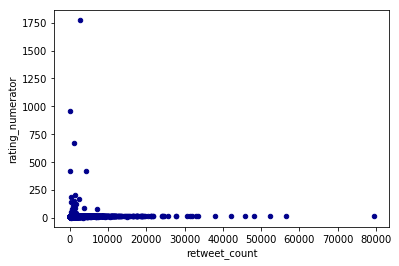

In [69]:
# Scatterplot - retweets and rating numerator 

ax1 = twitter_archive_master.plot.scatter(x='retweet_count',
                      y='rating_numerator',
                      c='DarkBlue')
print

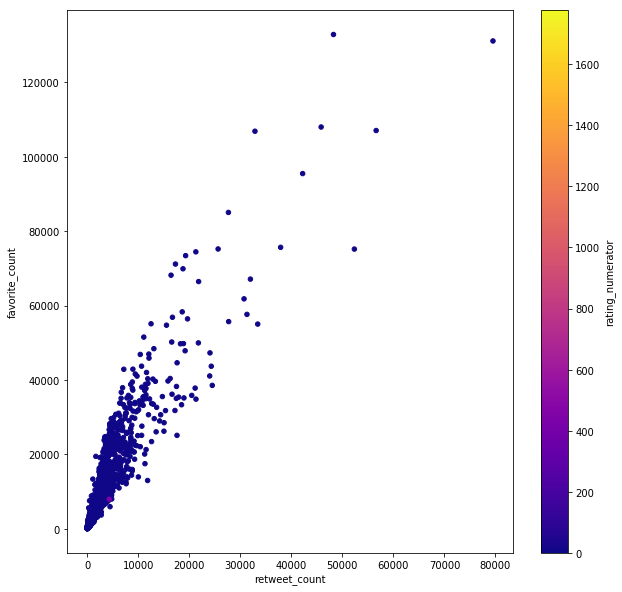

In [70]:
# Correlation between retweet_count, favorite_count and rating numerator.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
twitter_archive_master.plot(kind='scatter',x='retweet_count', 
                            y='favorite_count', c='rating_numerator',
                            colormap='plasma',figsize=(10,10), ax=ax)
#ax.set_xlabel("retweet_count")
plt.show()

In [71]:
######## Saving the cleaned data set as a csv file.
twitter_archive_master.to_csv('twitter_archive_master.csv')